In [1]:
from matplotlib import pyplot as plt
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
import csv
import os
from collections import defaultdict
# print(os.getcwd())

In [2]:
def read_csv_data(file):
    results = []
    with open(file, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
    
        for row in csvreader:
            results.append(float(row[-1]))

    return results

def read_full_data(file):
    results = defaultdict(list)
    # results['init_value'] = read_csv_data(file + "init_value.csv")
    results["init_value"] = read_csv_data(file + "environment.csv")
    return results

In [7]:
def convert_to_numpy(hmap):
    for k, v in hmap.items():
        hmap[k] = np.array(v)
    return hmap

metrics = ['iter', 
          'init_value', 
          'average_value_estimation', 
          'time', 
          'mean_time',
          'init_value_scaled']

def load_data(file):
  prefix = "/Users/abhik/d3rlpy/dev/hopper-bullet-mixed-v0/fqe_results_"
  with open(prefix + file) as f:
    data =  json.load(f)
  return data

cql_linear = load_data("cql_linear.json")
cql_nn = load_data("cql_nn.json")
sac_linear = load_data("sac_linear.json")
sac_nn = load_data("sac_nn.json")

cql_online = read_full_data("/Users/abhik/d3rlpy/d3rlpy_logs/CQL_20210517232215/")
sac_online = read_full_data("/Users/abhik/d3rlpy/d3rlpy_logs/SAC_20210517231728/")


In [4]:
def plot_stats(algo1, algo2, label1, label2, ylabel = None, idx = 1, save = True):

    metric = metrics[idx]
    iters = [i+1 for i in range(len(algo1[metric]))]

    plt.figure(figsize=(10, 8))
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),})

    plt.plot(algo1[metric], label = label1)
    plt.plot(algo2[metric], label = label2)
    assert algo1[metric]!=algo2[metric]

    plt.legend()
    plt.xlabel("Iterations")
    if not ylabel:
        plt.ylabel(metric)
        plt.title(metric)
    else:
        plt.ylabel(ylabel)
        plt.title(ylabel)

    if save:
        plt.savefig(label1 + "_vs_" + label2 + ".png", )

In [4]:
plot_stats(sac_nn, cql_nn, "sac_nn", "cql_nn", idx=1)

In [9]:
scaler = MinMaxScaler()

idx = 1
for metric in [cql_linear, cql_nn, sac_linear, sac_nn, cql_online, sac_online]:
    metric[metrics[idx]+"_scaled"] = scaler.fit_transform(np.array(metric[metrics[idx]]).reshape(-1,1)).flatten()

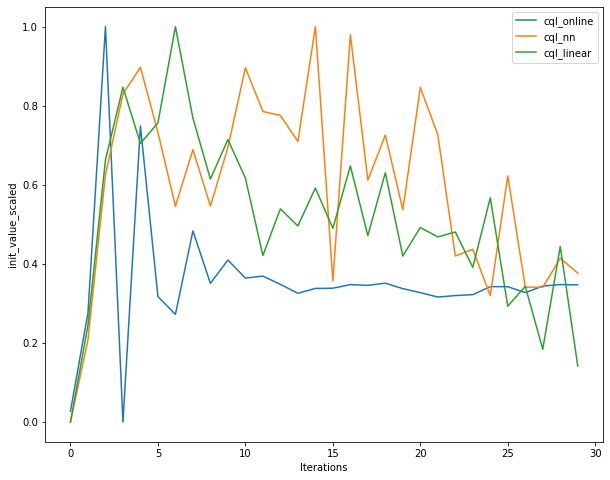

In [14]:
metric = metrics[-1]

plt.figure(figsize=(10, 8))
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),
})
# plt.plot(sac_online[metric], label = "sac_online")
# plt.plot(sac_nn[metric], label = "sac_nn")
# plt.plot(sac_linear[metric], label = "sac_linear")

plt.plot(cql_online[metric], label = "cql_online")
plt.plot(cql_nn[metric], label = "cql_nn")
plt.plot(cql_linear[metric], label = "cql_linear")

plt.legend()
plt.xlabel("Iterations")
plt.ylabel(metric)
plt.savefig("cql_scaled" + ".png", )